<a href="https://colab.research.google.com/github/IgorRachev27/Homework/blob/main/%D0%91%D0%BE%D0%BB%D1%8C%D1%88%D0%BE%D0%B5%20%D0%94%D0%97%202/%D0%B1%D0%BE%D0%BB%D1%8C%D1%88%D0%BE%D0%B5_%D0%B4%D0%B7_2%20%D0%A4%D0%98%D0%9D%D0%90%D0%9B%D0%AC%D0%9D%D0%90%D0%AF%20%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Важное замечание. Для тестирования моделей приходилось по многу раз их перезапускать, в связи с этим они были собраны в одну ячейку для экономии времени. Это совсем не значит, что я не понял как они работают и просто их переписал. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('../Downloads/ThoraricSurgery.csv')
df

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,466,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,F
466,467,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
467,468,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,F
468,469,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79,F


In [ ]:
print('всего видов диагнозов: ', df.DGN.value_counts().count())
print('всего значений диагнозов каждого вида:\n',df.DGN.value_counts())

всего видов диагнозов:  7
всего значений диагнозов каждого вида:
 DGN3    349
DGN2     52
DGN4     47
DGN5     15
DGN6      4
DGN8      2
DGN1      1
Name: DGN, dtype: int64


In [ ]:
# поищем закономерности

In [ ]:
for column in df:
    if df[column].value_counts().count()<4:
        print(column,':\n', df[column].value_counts())

PRE6 :
 PRZ1    313
PRZ0    130
PRZ2     27
Name: PRE6, dtype: int64
PRE7 :
 F    439
T     31
Name: PRE7, dtype: int64
PRE8 :
 F    402
T     68
Name: PRE8, dtype: int64
PRE9 :
 F    439
T     31
Name: PRE9, dtype: int64
PRE10 :
 T    323
F    147
Name: PRE10, dtype: int64
PRE11 :
 F    392
T     78
Name: PRE11, dtype: int64
PRE17 :
 F    435
T     35
Name: PRE17, dtype: int64
PRE19 :
 F    468
T      2
Name: PRE19, dtype: int64
PRE25 :
 F    462
T      8
Name: PRE25, dtype: int64
PRE30 :
 T    386
F     84
Name: PRE30, dtype: int64
PRE32 :
 F    468
T      2
Name: PRE32, dtype: int64
Risk1Yr :
 F    400
T     70
Name: Risk1Yr, dtype: int64


In [ ]:
# pre19 и pre32 при распределении 468 к 2 выглядят подозрительно.
# при том, что некоторых диагнозов у нас всего 2-3 штуки на весь датасет, есть смысл посмотреть их связь с
# pre19 и pre32

In [ ]:
df[df.DGN=='DGN1'][['PRE19','PRE32']]

,PRE19,PRE32
292,F,F


In [ ]:
df[df.DGN=='DGN8'][['PRE19','PRE32']]

,PRE19,PRE32
24,F,F
446,F,F


In [ ]:
df[df.DGN=='DGN6'][['PRE19','PRE32']]

,PRE19,PRE32
29,F,F
97,F,F
368,F,F
405,F,F


In [ ]:
# догадка не подтвердилась, по отдельности они влияния на результат не оказывают

In [ ]:
# посмотрим отдельно на три самых малочисленных диагноза

In [ ]:
df[df.DGN=='DGN6']

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
29,30,DGN6,3.96,3.28,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
97,98,DGN6,3.04,2.40,PRZ2,F,F,F,T,F,OC11,F,F,F,T,F,76,F
368,369,DGN6,3.88,2.72,PRZ1,F,F,F,T,F,OC12,F,F,F,T,F,77,F
405,406,DGN6,5.36,3.96,PRZ1,F,F,F,T,F,OC12,F,F,F,F,F,62,F


In [ ]:
df[df.DGN=='DGN8']

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
24,25,DGN8,4.32,3.2,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,58,T
446,447,DGN8,5.20,4.1,PRZ0,F,F,F,F,F,OC12,F,F,F,F,F,49,F


In [ ]:
df[df.DGN=='DGN1']

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
292,293,DGN1,3.8,2.8,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,62,F


In [ ]:
# ничего интересного

In [ ]:
df.DGN.value_counts()

DGN3    349
DGN2     52
DGN4     47
DGN5     15
DGN6      4
DGN8      2
DGN1      1
Name: DGN, dtype: int64

In [ ]:
# уберем столбец id
del df['id']
df

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,F
466,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
467,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,F
468,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79,F


In [ ]:
# проверим на наличие пустых значений
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DGN      470 non-null    object 
 1   PRE4     470 non-null    float64
 2   PRE5     470 non-null    float64
 3   PRE6     470 non-null    object 
 4   PRE7     470 non-null    object 
 5   PRE8     470 non-null    object 
 6   PRE9     470 non-null    object 
 7   PRE10    470 non-null    object 
 8   PRE11    470 non-null    object 
 9   PRE14    470 non-null    object 
 10  PRE17    470 non-null    object 
 11  PRE19    470 non-null    object 
 12  PRE25    470 non-null    object 
 13  PRE30    470 non-null    object 
 14  PRE32    470 non-null    object 
 15  AGE      470 non-null    int64  
 16  Risk1Yr  470 non-null    object 
dtypes: float64(2), int64(1), object(14)
memory usage: 62.5+ KB


In [ ]:
# проверим типы данных
df.dtypes

DGN         object
PRE4       float64
PRE5       float64
PRE6        object
PRE7        object
PRE8        object
PRE9        object
PRE10       object
PRE11       object
PRE14       object
PRE17       object
PRE19       object
PRE25       object
PRE30       object
PRE32       object
AGE          int64
Risk1Yr     object
dtype: object

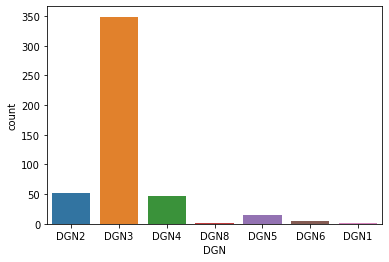

In [ ]:
# проверим сбалансированность классов
sns.countplot(df.DGN)

In [ ]:
# классы несбалансированны

In [ ]:
from sklearn import preprocessing
def encoding(DF):
    encoded_data=DF.copy()
    encoders={}
    for column in encoded_data:
        if encoded_data[column].dtype==object:
            encoders[column]=preprocessing.LabelEncoder()
            encoded_data[column]=encoders[column].fit_transform(encoded_data[column])
    return encoded_data, encoders
encoded_data, encoders = encoding(df)
encoded_data.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60,0
1,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
2,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
3,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
4,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9df9180250>,
      dtype=object)

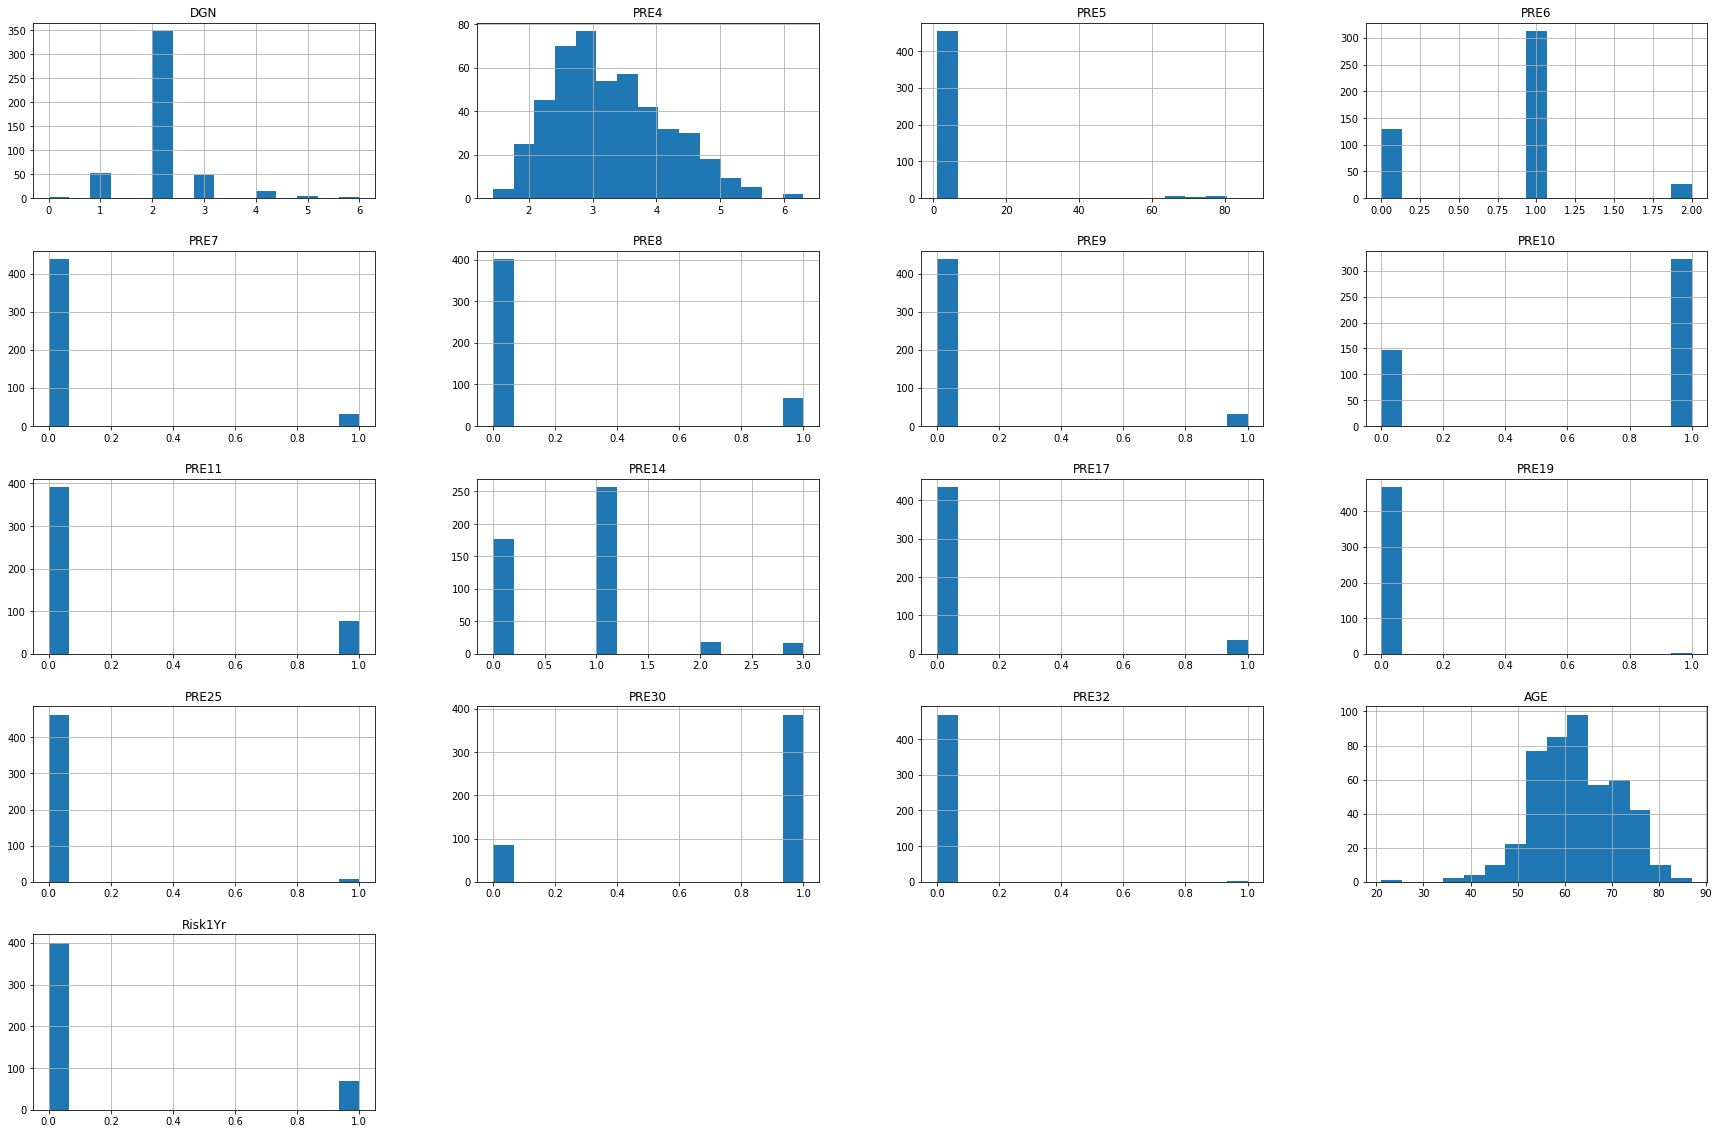

In [ ]:
# посмотрим на распределения
encoded_data.hist(figsize=(30,20), bins=15)

### для наглядности проведённой работы по поиску закономерностей отразил распределения по 2-м диагнозам, реально же посмотрел их все, меняя значения в ячейках

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9df97a62d0>,
      dtype=object)

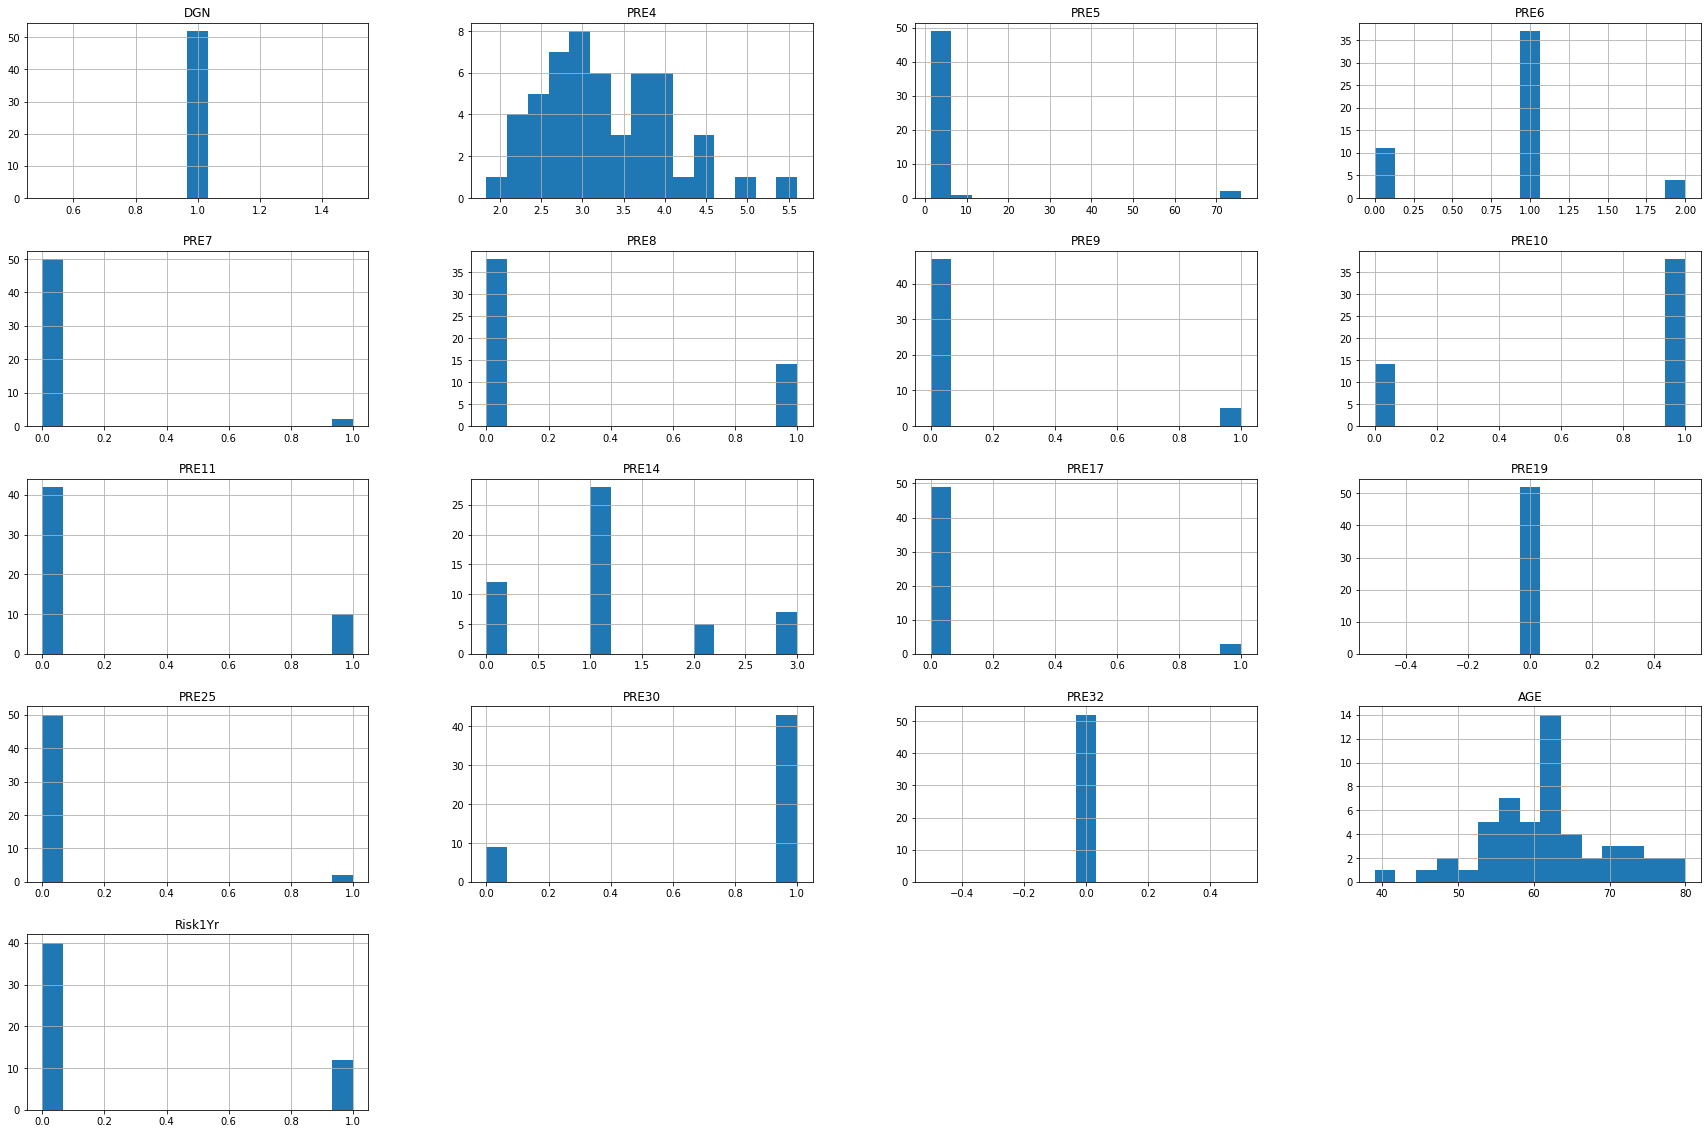

In [ ]:
encoded_data[encoded_data.DGN==1].hist(figsize=(30,20), bins=15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9dfbb99190>,
      dtype=object)

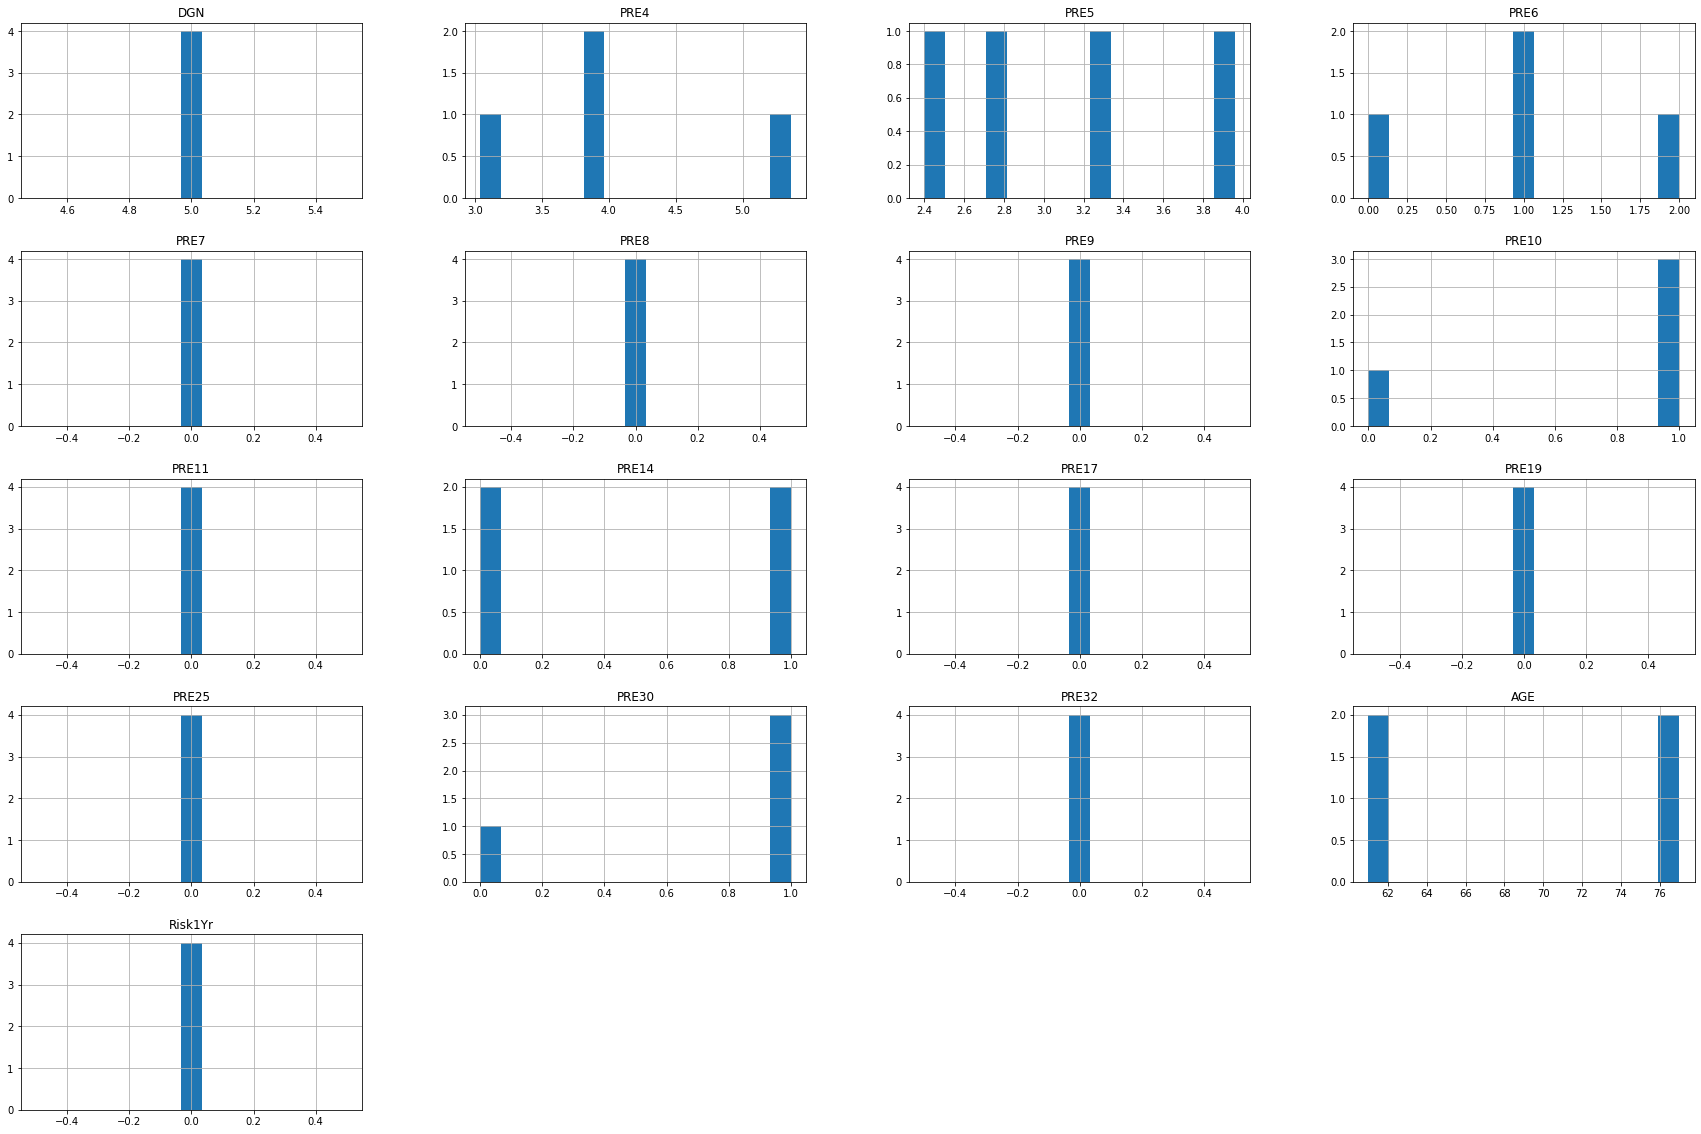

In [ ]:
encoded_data[encoded_data.DGN==5].hist(figsize=(30,20), bins=15)

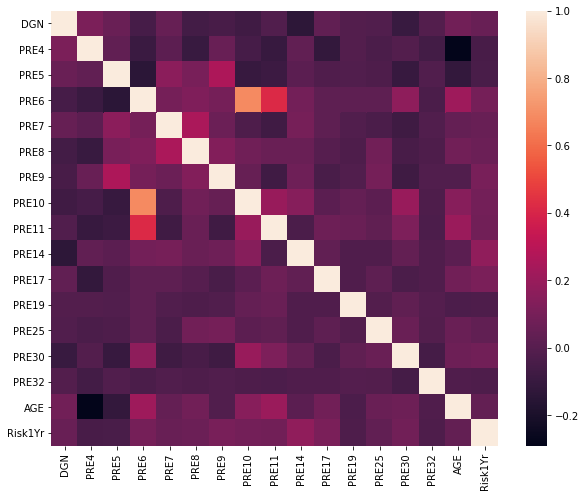

In [ ]:
# посмотрим на матрицу корреляций
fig = plt.subplots(figsize=(10,8))    
sns.heatmap(encoded_data.corr())

In [ ]:
y=encoded_data.DGN
X=encoded_data.drop('DGN', axis=1)

In [ ]:
from sklearn.preprocessing import scale
X_scaled = scale(np.array(X, dtype='float'), with_std=True, with_mean=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

# посмотрим на результаты простых моделей без аугментации данных

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(leaf_size=30)

from sklearn.model_selection import GridSearchCV

# Зададим сетку - среди каких значений выбирать наилучший параметр.
knn_grid = {'n_neighbors': np.arange(1,101,1)}

# Создаем объект кросс-валидации
gs = GridSearchCV(knn, knn_grid, cv=5)

# Обучаем его
gs.fit(X_scaled, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])})

In [ ]:
gs.best_params_, gs.best_score_

({'n_neighbors': 16}, 0.7425531914893617)

In [ ]:
best=gs.best_params_['n_neighbors']

In [ ]:
knn=KNeighborsClassifier(n_neighbors=best)

In [ ]:
knn_pred=knn.fit(X_train, y_train)

In [ ]:
y_knn=knn_pred.predict(X_test)
y_knn

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2])

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_knn))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.77      1.00      0.87        55
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.77        71
   macro avg       0.15      0.20      0.17        71
weighted avg       0.60      0.77      0.68        71



In [ ]:
# результат вообще никуда не годится

Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
regr=LogisticRegression(class_weight = 'balanced', solver='liblinear')
log_grid = {'C': np.arange(1,20,1), 'penalty':['l1','l2']} 

gs = GridSearchCV(regr, log_grid, cv=5)
gs.fit(X_scaled, y)

C_best=gs.best_params_['C']
P_best=gs.best_params_['penalty']
regr=LogisticRegression(C=C_best, penalty=P_best,solver='liblinear')
predictions=regr.fit(X_train, y_train).predict(X_test)
score = regr.score(X_test, y_test)
print('R^2: ', metrics.r2_score(y_test,predictions))
print('MAE: ',metrics.mean_absolute_error(y_test,predictions))
print('Accuracy: ',score)
print(metrics.classification_report(y_test,predictions))

R^2:  -0.0742074927953893
MAE:  0.3380281690140845
Accuracy:  0.7464788732394366
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.77      0.96      0.85        55
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.75        71
   macro avg       0.15      0.19      0.17        71
weighted avg       0.60      0.75      0.66        71



In [ ]:
# результат плачевный

In [ ]:
# попробуем SVM
from sklearn.svm import SVC
alg = SVC()

grid = {'C': np.array(np.linspace(1, 50, 10), dtype='float'),
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        }

gs = GridSearchCV(alg, grid, verbose=7, scoring = 'f1_micro', n_jobs = -1)
gs.fit(X_train, y_train)
C_best=gs.best_params_['C']
Kernel_best=gs.best_params_['kernel']
print(C_best, Kernel_best, gs.best_score_)

alg = SVC(C =  C_best, kernel = Kernel_best)
alg.fit(X_train, y_train)
preds = alg.predict(X_test)
print('R^2: ', metrics.r2_score(y_test,preds))
print('MAE: ',metrics.mean_absolute_error(y_test,preds))
print(metrics.classification_report(y_test, preds))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    2.2s


1.0 rbf 0.7368354430379747
R^2:  -0.02305475504322807
MAE:  0.30985915492957744
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.77      1.00      0.87        55
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.77        71
   macro avg       0.15      0.20      0.17        71
weighted avg       0.60      0.77      0.68        71



[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.8s finished


In [ ]:
# опять результат никуда не годится

In [ ]:
# попробуем провести работу с данными

In [ ]:
# для начала вернёмся к общему массиву данных и увеличим его размерность таким образом, чтобы в 
# тренировочной и тестовой части были все классы

In [ ]:
# добавим еще одну строку с единичным диагнозом 1

In [ ]:
df[df.DGN=='DGN1']

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
292,DGN1,3.8,2.8,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,62,F


In [ ]:
df.loc[470]=df.loc[292].copy()

In [ ]:
# чуть изменим данные в строке 470

In [ ]:
df.loc[470,'PRE4']=round(df.loc[470]['PRE4']*1.01,2)
df.loc[470,'PRE5']=round(df.loc[470]['PRE4']*1.01,2)

In [ ]:
df.tail()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
466,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
467,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,F
468,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79,F
469,DGN3,4.72,3.56,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
470,DGN1,3.84,3.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,62,F


In [ ]:
encoded_data, encoders = encoding(df)
y=encoded_data.DGN
X=encoded_data.drop('DGN', axis=1)
X_scaled = scale(np.array(X, dtype='float'), with_std=True, with_mean=True)

In [ ]:
y[y==0]

292    0
470    0
Name: DGN, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=123)

In [ ]:
# отложим для нейросети
X16_train=X_train.copy()
y16_train=y_train.copy()
X16_test=X_test.copy()
y16_test=y_test.copy()

In [ ]:
# проверим все ли классы вошли в тестовую часть
unique, counts = np.unique(y_test, return_counts=True)

print (np.asarray((unique, counts)).T)

[[ 0  1]
 [ 1 11]
 [ 2 46]
 [ 3  9]
 [ 4  2]
 [ 5  1]
 [ 6  1]]


In [ ]:
# проверим все ли классы вошли в тренировочную часть
unique, counts = np.unique(y_train, return_counts=True)

print (np.asarray((unique, counts)).T)

[[  0   1]
 [  1  41]
 [  2 303]
 [  3  38]
 [  4  13]
 [  5   3]
 [  6   1]]


In [ ]:
# отлично, нам повезло, мы подобрали такое распределение (random_state) при котором в трейновой и тестовой 
# части присутствуют все классы

In [ ]:
# попробуем балансировку классов under_sampling

In [ ]:
from imblearn.under_sampling import TomekLinks

augm = TomekLinks(sampling_strategy='majority')
X_train_und, y_train_und = augm.fit_resample(np.array(X_train), np.array(y_train))

In [ ]:
pd.Series(y_train).value_counts()

2    303
1     41
3     38
4     13
5      3
0      1
6      1
Name: DGN, dtype: int64

In [ ]:
pd.Series(y_train_und).value_counts()

2    261
1     41
3     38
4     13
5      3
0      1
6      1
dtype: int64

In [ ]:
# сбалансируем классы через SMOTE. будем использовать данные после обработки undersampling'ом

In [ ]:
# необходимо вручную сгенерировать дополнительно несколько данных класса, т.к. алгоритм SMOTE основан на
# работе с ближайшими соседями по классу, а в нашем случае соседей по классу просто нет.
# Добавим по 2 значения в 0 и в 6 классы

In [ ]:
klass0=np.where(y_train_und==0)[0][0]
klass6=np.where(y_train_und==6)[0][0]

In [ ]:
X_train_und.shape

(358, 16)

In [ ]:
change1_1=X_train_und[klass0].copy()
change1_1[0]=change1_1[0]*1.01
change1_1[1]=change1_1[1]*1.01
change1_1

array([ 0.64689425, -0.05910916, -1.45522678, -0.26543275, -0.41077304,
       -0.26543275, -1.4773058 , -0.4455034 ,  0.37564031, -0.28332884,
       -0.06530231, -0.13144816,  0.46589083, -0.06530231, -0.06133544,
       -0.41780808])

In [ ]:
change1_2=X_train_und[klass0].copy()
change1_2[0]=change1_2[0]*0.99
change1_2[1]=change1_2[1]*0.99
change1_2

array([ 0.63408446, -0.05793868, -1.45522678, -0.26543275, -0.41077304,
       -0.26543275, -1.4773058 , -0.4455034 ,  0.37564031, -0.28332884,
       -0.06530231, -0.13144816,  0.46589083, -0.06530231, -0.06133544,
       -0.41780808])

In [ ]:
change6_1=X_train_und[klass6].copy()
change6_1[0]=change6_1[0]*1.01
change6_1[1]=change6_1[1]*1.01
change6_1

array([ 2.22588513, -0.04018707, -1.45522678, -0.26543275, -0.41077304,
       -0.26543275, -1.4773058 , -0.4455034 ,  0.37564031, -0.28332884,
       -0.06530231, -0.13144816, -2.1464256 , -0.06530231, -1.55757798,
       -0.41780808])

In [ ]:
change6_2=X_train_und[klass6].copy()
change6_2[0]=change6_2[0]*0.99
change6_2[1]=change6_2[1]*0.99
change6_2

array([ 2.1818082 , -0.03939129, -1.45522678, -0.26543275, -0.41077304,
       -0.26543275, -1.4773058 , -0.4455034 ,  0.37564031, -0.28332884,
       -0.06530231, -0.13144816, -2.1464256 , -0.06530231, -1.55757798,
       -0.41780808])

In [ ]:
X_train_und=np.append(X_train_und,[change1_1, change1_2,change6_1, change6_2]).reshape(362,16)
X_train_und

array([[-0.78492467, -0.25609031, -1.45522678, ..., 15.31339283,
        -0.17643102, -0.41780808],
       [ 0.45656496, -0.12665026,  0.41238034, ..., -0.06530231,
         0.05376014, -0.41780808],
       [ 1.88197898, -0.07214919, -1.45522678, ..., -0.06530231,
        -0.2915266 , -0.41780808],
       ...,
       [ 0.63408446, -0.05793868, -1.45522678, ..., -0.06530231,
        -0.06133544, -0.41780808],
       [ 2.22588513, -0.04018707, -1.45522678, ..., -0.06530231,
        -1.55757798, -0.41780808],
       [ 2.1818082 , -0.03939129, -1.45522678, ..., -0.06530231,
        -1.55757798, -0.41780808]])

In [ ]:
y_train_und=np.append(y_train_und,[0,0,6,6])
y_train_und

array([2, 2, 3, 2, 1, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 1,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 4, 2, 1, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 3, 2, 2, 2, 1, 2, 2, 3, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 4, 2, 2, 2, 1, 2, 2,
       2, 2, 4, 1, 2, 1, 1, 4, 2, 2, 2, 1, 3, 2, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 3,
       1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 1, 4, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 4, 4, 2, 2, 2, 3, 2, 2, 2, 4, 2, 2, 2, 1, 2,
       2, 2, 3, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 3, 2, 1, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 4, 2, 4, 1,
       3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 6, 4, 2, 2, 2,

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN

augm = SMOTE(random_state=1, k_neighbors=2)
X_train_ov_S, y_train_ov_S = augm.fit_resample(X_train_und, y_train_und)

In [ ]:
pd.DataFrame(y_train_ov_S).value_counts()

0    261
1    261
2    261
3    261
4    261
5    261
6    261
dtype: int64

In [ ]:
X_train_ov_S.shape

(1827, 16)

In [ ]:
# для нейросети
X_net=X_train_ov_S.copy()
y_net=y_train_ov_S.copy()

In [ ]:
# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(leaf_size=30)

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Зададим сетку - среди каких значений выбирать наилучший параметр.
knn_grid = {'n_neighbors': np.arange(1,101,1)} 

# Создаем объект кросс-валидации
gs = GridSearchCV(knn, knn_grid, cv=5)

# Обучаем его
gs.fit(X, y)

best=gs.best_params_['n_neighbors']

In [ ]:
knn=KNeighborsClassifier(n_neighbors=best)
knn_pred=knn.fit(X_train_ov_S, y_train_ov_S)
y_knn=knn_pred.predict(X_test)


In [ ]:
print('R^2: ', metrics.r2_score(y_test,y_knn))
print('MAE: ',metrics.mean_absolute_error(y_test,y_knn))
print(metrics.classification_report(y_test,y_knn))

R^2:  -1.2731365682841416
MAE:  0.9577464788732394
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.29      0.55      0.37        11
           2       0.75      0.26      0.39        46
           3       0.21      0.56      0.30         9
           4       0.17      0.50      0.25         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.35        71
   macro avg       0.34      0.41      0.33        71
weighted avg       0.58      0.35      0.37        71



In [ ]:
#регрессия

In [ ]:
regr=LogisticRegression(class_weight = 'balanced', solver='liblinear')
log_grid = {'C': np.arange(1,20,1), 'penalty':['l1','l2']} 

gs = GridSearchCV(regr, log_grid, cv=5)
gs.fit(X_scaled, y)

C_best=gs.best_params_['C']
P_best=gs.best_params_['penalty']
regr=LogisticRegression(C=C_best, penalty=P_best,solver='liblinear')
predictions=regr.fit(X_train_ov_S, y_train_ov_S).predict(X_test)
score = regr.score(X_test, y_test)

In [ ]:
print('R^2: ', metrics.r2_score(y_test,predictions))
print('MAE: ',metrics.mean_absolute_error(y_test,predictions))
print('Accuracy: ',score)
print(metrics.classification_report(y_test,predictions))

R^2:  -2.7826413206603293
MAE:  1.2535211267605635
Accuracy:  0.3380281690140845
              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       0.11      0.09      0.10        11
           2       0.83      0.41      0.55        46
           3       0.08      0.11      0.10         9
           4       0.10      0.50      0.17         2
           5       0.09      1.00      0.17         1
           6       0.00      0.00      0.00         1

    accuracy                           0.34        71
   macro avg       0.21      0.45      0.21        71
weighted avg       0.57      0.34      0.40        71



In [ ]:
# попробуем SVM
from sklearn.svm import SVC
alg = SVC()

grid = {'C': np.array(np.linspace(1, 50, 50), dtype='float'),
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        }

gs = GridSearchCV(alg, grid, verbose=7, scoring = 'f1_micro', n_jobs = -1)
gs.fit(X_train_ov_S, y_train_ov_S)
C_best=gs.best_params_['C']
Kernel_best=gs.best_params_['kernel']
print(C_best, Kernel_best, gs.best_score_)

alg = SVC(C =  C_best, kernel = Kernel_best)
alg.fit(X_train_ov_S, y_train_ov_S)
preds = alg.predict(X_test)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 517 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 880 tasks      | elapsed:   40.6s


39.0 rbf 0.9332285350699904


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   51.1s finished


In [ ]:
print('R^2: ', metrics.r2_score(y_test,preds))
print('MAE: ',metrics.mean_absolute_error(y_test,preds))
print(metrics.classification_report(y_test, preds))

R^2:  -0.6160580290145068
MAE:  0.7183098591549296
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.27      0.36      0.31        11
           2       0.70      0.57      0.63        46
           3       0.29      0.44      0.35         9
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.49        71
   macro avg       0.32      0.34      0.33        71
weighted avg       0.55      0.49      0.51        71



In [ ]:
# Полиномиальные признаки

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
degree=3
X_tr=PolynomialFeatures(degree).fit_transform(X_train_und)
X_tst=PolynomialFeatures(degree).fit_transform(X_test)

In [ ]:
# попробуем SVM
from sklearn.svm import SVC
alg = SVC()

grid = {'C': np.array(np.linspace(1, 50, 50), dtype='float'),
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        }

gs = GridSearchCV(alg, grid, verbose=7, scoring = 'f1_micro', n_jobs = -1)
gs.fit(X_tr, y_train_und)
C_best=gs.best_params_['C']
Kernel_best=gs.best_params_['kernel']
print(C_best, Kernel_best, gs.best_score_)

alg = SVC(C =  C_best, kernel = Kernel_best)
alg.fit(X_tr, y_train_und)
preds = alg.predict(X_tst)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   24.9s finished


1.0 poly 0.7210045662100457


In [ ]:
print('R^2: ', metrics.r2_score(y_test,preds))
print('MAE: ',metrics.mean_absolute_error(y_test,preds))
print(metrics.classification_report(y_test, preds))

R^2:  -0.012256128064031868
MAE:  0.4647887323943662
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        11
           2       0.65      1.00      0.79        46
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.65        71
   macro avg       0.09      0.14      0.11        71
weighted avg       0.42      0.65      0.51        71



In [ ]:
# полиномиальные признаки не дали нужного результата

In [ ]:
X_tr

array([[ 1.00000000e+00, -7.84924668e-01, -2.56090307e-01, ...,
        -1.30054897e-02, -3.07984319e-02, -7.29340787e-02],
       [ 1.00000000e+00,  4.56564963e-01, -1.26650263e-01, ...,
        -1.20752929e-03,  9.38456373e-03, -7.29340787e-02],
       [ 1.00000000e+00,  1.88197898e+00, -7.21491919e-02, ...,
        -3.55085714e-02, -5.08899297e-02, -7.29340787e-02],
       ...,
       [ 1.00000000e+00,  6.34084459e-01, -5.79386849e-02, ...,
        -1.57180895e-03, -1.07069341e-02, -7.29340787e-02],
       [ 1.00000000e+00,  2.22588513e+00, -4.01870728e-02, ...,
        -1.01362294e+00, -2.71896406e-01, -7.29340787e-02],
       [ 1.00000000e+00,  2.18180820e+00, -3.93912891e-02, ...,
        -1.01362294e+00, -2.71896406e-01, -7.29340787e-02]])

In [ ]:
augm = SMOTE(random_state=1, k_neighbors=2)
X_train_ov_S, y_train_ov_S = augm.fit_resample(X_tr, y_train_und)
X_train_ov_S.shape

(1827, 969)

In [ ]:
# попробуем SVM (полиномиальные + SMOTE)
from sklearn.svm import SVC
alg = SVC()

grid = {'C': np.array(np.linspace(1, 100, 10), dtype='float'),
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        }

gs = GridSearchCV(alg, grid, verbose=2, scoring = 'f1_micro', n_jobs = -1)
gs.fit(X_train_ov_S, y_train_ov_S)
C_best=gs.best_params_['C']
Kernel_best=gs.best_params_['kernel']
print(C_best, Kernel_best, gs.best_score_)

alg = SVC(C =  C_best, kernel = Kernel_best)
alg.fit(X_train_ov_S, y_train_ov_S)
preds = alg.predict(X_tst)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  5.2min finished


45.0 linear 0.936504229358485


In [ ]:
print('R^2: ', metrics.r2_score(y_test,preds))
print('MAE: ',metrics.mean_absolute_error(y_test,preds))
print(metrics.classification_report(y_test, preds))

R^2:  -0.8824412206103047
MAE:  0.7323943661971831
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.15      0.18      0.17        11
           2       0.73      0.59      0.65        46
           3       0.27      0.44      0.33         9
           4       0.50      0.50      0.50         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.49        71
   macro avg       0.28      0.39      0.31        71
weighted avg       0.55      0.49      0.51        71



# Решение задачи через нейросеть

In [ ]:
# pytorch
import torch

In [ ]:
# взглянем на разделение признаков
pd.Series(y16_train).value_counts(), pd.Series(y16_test).value_counts()

(2    303
 1     41
 3     38
 4     13
 5      3
 0      1
 6      1
 Name: DGN, dtype: int64,
 2    46
 1    11
 3     9
 4     2
 0     1
 5     1
 6     1
 Name: DGN, dtype: int64)

In [ ]:
# обернём сделанные из массивов тензоры в Variable
X = torch.autograd.Variable(torch.FloatTensor(X16_train))
y = torch.autograd.Variable(torch.LongTensor(y16_train))

In [ ]:
y16_train

190    2
54     2
189    3
436    2
327    2
      ..
230    2
98     2
322    2
382    3
365    2
Name: DGN, Length: 400, dtype: int64

In [ ]:
X.shape, y.shape

(torch.Size([400, 16]), torch.Size([400]))

## Сама сеть

In [ ]:
# N - размер батча; 
# D_in - размерность входа (количество признаков у объекта);
# H - размерность скрытых слоёв; 
# D_out - размерность выходного слоя (суть - количество классов)
N, D_in, H, D_out = 64, 16, 10, 7

net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.Sigmoid(),
    torch.nn.Linear(H, H),
    torch.nn.Sigmoid(),
    torch.nn.Linear(H, D_out))

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 0.01
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
for t in range(50000):
    # forward
    y_pred = net(X)
    

    # loss
    loss = loss_fn(y_pred, y)

    # зануляем градиенты (чтобы не было остатка с предыдущего шага)
    optimizer.zero_grad()

    # backward
    loss.backward()

    # обновляем
    optimizer.step()

In [ ]:
loss.data

tensor(1.6066)

In [ ]:
# финальные предсказания вернём в вид numpy array
y_pred=y_pred.detach().numpy()

In [ ]:
#  построим вектор ответов

In [ ]:
def predict(X):
    y_pr=[]
    for i in range(X):
        y_pr.append(y_pred[i].argmax())
    return pd.Series(y_pr)

In [ ]:
y_pr=predict(y_pred.shape[0])
y_pr

0      2
1      2
2      3
3      2
4      2
      ..
395    2
396    2
397    2
398    3
399    2
Length: 400, dtype: int64

In [ ]:
# посмотрим где на трейновой части расхождения

In [ ]:
y_pr[y_pr!=np.array(y16_train)]

150    3
dtype: int64

In [ ]:
X16_test.shape

(71, 16)

In [ ]:
# с помощью сети сделаем предсказание на тестовой выборке

In [ ]:
Y=net(torch.autograd.Variable(torch.FloatTensor(X16_test)))

In [ ]:
Y=Y.detach().numpy()

In [ ]:
Y=predict(Y.shape[0])

In [ ]:
y16_test

11     2
400    2
275    2
162    2
274    1
      ..
41     1
413    1
385    2
434    2
433    2
Name: DGN, Length: 71, dtype: int64

In [ ]:
# процент ошибочных ответов
Y[Y!=np.array(y16_test)].count()/Y.count()

0.4225352112676056

In [ ]:
print('R^2: ', metrics.r2_score(y16_test,Y))
print('MAE: ',metrics.mean_absolute_error(y16_test,Y))
print(metrics.classification_report(y16_test,Y))

R^2:  -0.2076038019009503
MAE:  0.5633802816901409
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.20      0.09      0.13        11
           2       0.66      0.83      0.73        46
           3       0.25      0.22      0.24         9
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.58        71
   macro avg       0.16      0.16      0.16        71
weighted avg       0.49      0.58      0.52        71



## попробуем нейросеть на аугментированных данных

### ручная аугментация

In [ ]:
X = torch.autograd.Variable(torch.FloatTensor(X_train_und))
y = torch.autograd.Variable(torch.LongTensor(y_train_und))

In [ ]:
X.shape, y.shape

(torch.Size([362, 16]), torch.Size([362]))

In [ ]:
# N - размер батча; 
# D_in - размерность входа (количество признаков у объекта);
# H - размерность скрытых слоёв; 
# D_out - размерность выходного слоя (суть - количество классов)
N, D_in, H, D_out = 64, 16, 100, 7

net2 = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.Sigmoid(),
    torch.nn.Linear(H, H),
    torch.nn.Sigmoid(),
    torch.nn.Linear(H, D_out))

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 0.01
optimizer = torch.optim.SGD(net2.parameters(), lr=learning_rate)
for t in range(50000):
    # forward
    y_pred = net2(X)
    

    # loss
    loss = loss_fn(y_pred, y)

    # зануляем градиенты (чтобы не было остатка с предыдущего шага)
    optimizer.zero_grad()

    # backward
    loss.backward()

    # обновляем
    optimizer.step()

In [ ]:
loss.data

tensor(0.0490)

In [ ]:
# финальные предсказания вернём в вид numpy array
y_pred=y_pred.detach().numpy()

In [ ]:
y_pr=predict(y_pred.shape[0])
y_pr

0      2
1      2
2      3
3      2
4      1
      ..
357    2
358    0
359    0
360    6
361    6
Length: 362, dtype: int64

In [ ]:
# посмотрим где на трейновой части расхождения

In [ ]:
y_pr[y_pr!=y_train_und]

Series([], dtype: int64)

In [ ]:
y_pr

0      2
1      2
2      3
3      2
4      1
      ..
357    2
358    0
359    0
360    6
361    6
Length: 362, dtype: int64

In [ ]:
Y=net2(torch.autograd.Variable(torch.FloatTensor(X16_test))).detach().numpy()

In [ ]:
Y=predict(Y.shape[0])

In [ ]:
# процент ошибочных ответов
Y[Y!=np.array(y16_test)].count()/Y.count()

0.39436619718309857

In [ ]:
print('R^2: ', metrics.r2_score(y16_test,Y))
print('MAE: ',metrics.mean_absolute_error(y16_test,Y))
print(metrics.classification_report(y16_test,Y))

R^2:  -0.2608804402201097
MAE:  0.5492957746478874
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.57      0.36      0.44        11
           2       0.69      0.83      0.75        46
           3       0.11      0.11      0.11         9
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.61        71
   macro avg       0.20      0.19      0.19        71
weighted avg       0.55      0.61      0.57        71



### SMOTE

In [ ]:
X = torch.autograd.Variable(torch.FloatTensor(X_net))
y = torch.autograd.Variable(torch.LongTensor(y_net))

In [ ]:
X.shape, y.shape

(torch.Size([1827, 16]), torch.Size([1827]))

In [ ]:
# N - размер батча; 
# D_in - размерность входа (количество признаков у объекта);
# H - размерность скрытых слоёв; 
# D_out - размерность выходного слоя (суть - количество классов)
N, D_in, H, D_out = 64, 16 , 100, 7

net3 = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.Sigmoid(),
    torch.nn.Linear(H, H),
    torch.nn.Sigmoid(),
    torch.nn.Linear(H, D_out))

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 0.001
optimizer = torch.optim.SGD(net3.parameters(), lr=learning_rate)
for t in range(25000):
    # forward
    y_pred = net3(X)
    

    # loss
    loss = loss_fn(y_pred, y)

    # зануляем градиенты (чтобы не было остатка с предыдущего шага)
    optimizer.zero_grad()

    # backward
    loss.backward()

    # обновляем
    optimizer.step()

In [ ]:
loss.data

tensor(4.5233)

In [ ]:
# финальные предсказания вернём в вид numpy array
y_pred=y_pred.detach().numpy()

In [ ]:
y_pr=predict(y_pred.shape[0])
y_pr

0       2
1       2
2       3
3       2
4       1
       ..
1822    6
1823    6
1824    6
1825    6
1826    6
Length: 1827, dtype: int64

In [ ]:
y_pr[y_pr!=y_net]

Series([], dtype: int64)

In [ ]:
Y=net3(torch.autograd.Variable(torch.FloatTensor(X16_test))).detach().numpy()

In [ ]:
Y=predict(Y.shape[0])

In [ ]:
print('R^2: ', metrics.r2_score(y16_test,Y))
print('MAE: ',metrics.mean_absolute_error(y16_test,Y))
print(metrics.classification_report(y16_test,Y))

R^2:  -0.2608804402201097
MAE:  0.5492957746478874
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.57      0.36      0.44        11
           2       0.69      0.83      0.75        46
           3       0.11      0.11      0.11         9
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.61        71
   macro avg       0.20      0.19      0.19        71
weighted avg       0.55      0.61      0.57        71



### попробуем изменить параметры нейросети

In [ ]:
X = torch.autograd.Variable(torch.FloatTensor(X16_train))
y = torch.autograd.Variable(torch.LongTensor(y16_train))

In [ ]:
# N - размер батча; 
# D_in - размерность входа (количество признаков у объекта);
# H - размерность скрытых слоёв; 
# D_out - размерность выходного слоя (суть - количество классов)
N, D_in, H, D_out = 64, 16, 100, 7

net4 = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out))

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 0.0001
optimizer = torch.optim.SGD(net4.parameters(), lr=learning_rate)
for t in range(100000):
    # forward
    y_pred = net4(X)
    

    # loss
    loss = loss_fn(y_pred, y)

    # зануляем градиенты (чтобы не было остатка с предыдущего шага)
    optimizer.zero_grad()

    # backward
    loss.backward()

    # обновляем
    optimizer.step()

In [ ]:
print(loss.data)
y_pred=y_pred.detach().numpy()
y_pr=predict(y_pred.shape[0])
Y=net4(torch.autograd.Variable(torch.FloatTensor(X16_test))).detach().numpy()
Y=predict(Y.shape[0])

tensor(1.4059)


In [ ]:
print('R^2: ', metrics.r2_score(y16_test,Y))
print('MAE: ',metrics.mean_absolute_error(y16_test,Y))
print(metrics.classification_report(y16_test,Y))

R^2:  -0.18984492246123041
MAE:  0.5492957746478874
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.20      0.09      0.13        11
           2       0.66      0.85      0.74        46
           3       0.29      0.22      0.25         9
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.59        71
   macro avg       0.16      0.17      0.16        71
weighted avg       0.50      0.59      0.53        71



### в четвёртой нейросети при изменении основных параметров в виде функции активации, learning rate, оптимайзера и т.д. прироста в эффективности не случилось

### нейросеть по сравнению с классическими моделями показала себя в некотором смысле хуже. Часть классов определялось неплохо, но малочисленные классы не определялись вообще

### регрессия и svm (полимиальные + SMOTE) лучше других моделей определяли классы. Общая точность плохая, но почти во всех классах данные модели определили хотя бы один экземпляр